In [332]:
from importlib import reload
import single_process_mdp
reload(single_process_mdp)
from single_process_mdp import SingleProcessMDP
import matplotlib.pyplot as plt
import numpy as np

In [333]:
class QLearn:
    """
    QLearn
    """
    def __init__(self, env, epsilon = 0.1, gamma = 0.95, episodes = 100):
        self.env = env
        self.epsilon = epsilon  # exploration rate
        self.gamma = gamma      # discount factor
        self.episodes = episodes
        self.q_history = None
        self.optimal_policy = None
        self.mse_loss = np.empty((self.episodes))
        self.mae_loss = np.empty((self.episodes))

    def reset(self):
        self.q_history = None
        self.optimal_policy = None
        s = self.env.reset()
        return s

    def choose_action(self, q, s):
        if np.random.rand () < self.epsilon:
            return np.random.choice(self.env.na)
        else:
            return np.argmax(q[s])
        

    def execute(self):
        counts = np.zeros((self.env.ns, self.env.na))
        q = np.random.rand(self.env.ns, self.env.na) # Initialize Q-value table
        q_history = np.zeros((self.episodes, self.env.ns, self.env.na))

        for t in range(self.episodes):
            s = self.reset() # Reset the MDP in each episode

            done = False

            while not done: # Repeat until the job completes
                a = self.choose_action(q, s)

                counts[s, a] += 1

                # Perform action -> get new state, reward (loss), and done flag
                s_prime, r, is_done = self.env.step(a)

                # Update Q-Value
                delta = r + self.gamma * (np.max(q[s_prime], axis=0)) - q[s, a]
                alpha = 2 / (counts[s, a]**(2/3) + 1)
                q[s, a] = q[s, a] + (alpha * delta)
                q_history[t] = q

                # Move to next state
                s = s_prime
                done = is_done

        self.q_history = q_history
        self.optimal_policy = np.argmax(q_history[-1], axis=1)
        return q_history
    
    def compute_loss(self, calc_mae=False, calc_mse=True):
        for i in range(self.episodes):
            diff = self.q_history[-1] - self.q_history[i]

            if calc_mae:
                infnorm = np.linalg.norm(diff, ord=np.inf)
                self.mae_loss[i] = infnorm

            if calc_mse:
                self.mse_loss[i] =  np.mean(diff ** 2)

    def plot_loss(self, plot_mae=False, plot_mse=True):
        if plot_mae:
            plt.plot(self.mae_loss, label="Mean Absolute Error")
        if plot_mse:
            plt.plot(self.mse_loss, label="Mean Squared Error")

        plt.xlabel("Episode")
        plt.ylabel("Error")

        if plot_mae and plot_mse:
            plt.legend()

        plt.show()


In [334]:
NUM_STATES = 10
env = SingleProcessMDP(NUM_STATES)
env.reset()

EPISODES = 1000
EPSILON = 0.1
GAMMA = 0.95
q_learn = QLearn(env, epsilon=EPSILON, episodes=EPISODES)
hist = q_learn.execute()

Optimal Q: [[10.20863791 11.07877787]
 [10.8029965  11.7421983 ]
 [11.3543185  12.4405356 ]
 [12.26855824 13.17562749]
 [12.91591852 13.94940843]
 [13.66529243 14.76391468]
 [14.63354818 15.62128968]
 [15.45082098 16.52378968]
 [16.22599826 17.47378968]
 [17.27378156 18.47378968]]
Optimal Policy: [1 1 1 1 1 1 1 1 1 1]


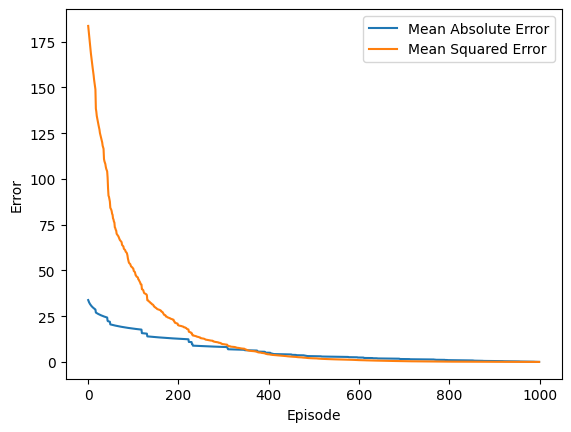

In [335]:
optimal_q = hist[-1] # Optimal is the last one we stopped on.

print("Optimal Q:", optimal_q)

optimal_policy = np.argmax(optimal_q, axis=1)
print("Optimal Policy:", optimal_policy)

q_learn.compute_loss(True, True)
q_learn.plot_loss(True, True)